# Verkefni 2: Reiknirit (Simplex og Interior Point)

**1: Sauðakóði fyrir Simplex-aðferðina**

Í þessu verkefni skal skrifa sauðakóða fyrir Simplex-aðferðina. Markmiðið er að lýsa skrefum aðferðarinnar á formlegan og skýran hátt, þannig að hægt sé að útfæra hana í forritunarmáli síðar. Að lokum á sauðakóðinn að skila bestu lausn fyrir ákvörðunarbreyturnar (𝑥-vigur).

  - `c` er vektor sem táknar kostnaðarstuðla markmiðsfallsins.
  - `A` er fylki sem táknar stuðla skorðujöfnunnar.
  - `b` er vektor sem táknar hægri hlið skorðanna.

Fallið sem þú ert að lýsa er: `x, T = Simplex(c, A, b)`, og þú þarft að útskýra í sauðakóða hvernig fallið virkar. Fallið skilar ákvörðunarbreytur `x` og loka Simplex töflu `T`.

Dæmi um [sauðakóða](https://en.wikipedia.org/wiki/Pseudocode):
```plaintext
FALL initTafla(c,A,b)
    inntak: Kostnaðarvigur c
            Skorðufylki A
            Hægri hlið b
    úttak: Upphafleg Simplex tafla T

    # Skilgreina stærðir
    m ← fjöldi skorða
    n ← fjöldi ákvörðunarbreyta

    # Búa til tóma töflu með m+1 röðum og n+m+1 dálkum
    T ← núllfylki(m+1, n+m+1)

    # Fyllum inn markfall (neikvætt c og núll fyrir slakabreytur)
    T[0, 0:n] ← -c
    T[0, n:n+m] ← 0  # Slakabreytur í markfalli
    T[0, -1] ← 0     # Hægri hlið fyrir markfall

    # Fyllum inn skorðufylkið A og b
    fyrir i frá 1 til m geri
        T[i, 0:n] ← A[i-1, :]   # Skorðustuðlar
        T[i, n+i-1] ← 1         # Slakabreytur (I fylki)
        T[i, -1] ← b[i-1]       # Hægri hlið fyrir skorður

    skila T
END FALL

FALL Simplex(c, A, b)

    .
    .
    .

    Skila x lausn úr lokatöflu og lokatöflu T
END FALL
```

**2: Leysið "diet" verkefni með scipy.optimize linprog**


Gefið er línulegt bestunarlíkan fyrir "diet" verkefnið:

- $h \in H$: hráefnin sem hægt er að velja,
- $n \in N$: næringarefni (orka, prótein, kolvetni, fita o.s.frv.),
- $f \in F$: flokkar hráefna (prótein, kolvetni, grænmeti-ávextir).

og ákvarðanirnar eru táknaðar með eftirfarandi breytum:
- $x_h\ge 0$: magn í 100gr af hráefni $h$ í máltíðinni.

stikar líkansins (eiginleikar hráefna) eru:
- $c_h$: verð (ISK) á hverju hráefni $h$ á hver 100g.
- $A_{h,n}$: næringargildi $n$ í hverju 100g. af hráefni $h$,
- $b_n$: lágmark nauðsynlegt magn næringarefnis $n$


Markmiðið er að hanna prótínríka ($n_p\in N$) máltíð, eða:

$$
\text{max} \quad Z = \sum_{h \in H} A_{h,n_p}  x_h
$$

m.t.t. eftirfarandi skilyrða:

1. Tryggja að allar næringarþarfir séu uppfylltar
$$
   \sum_{h \in H} A_{h,n} x_h \ge b_n, \quad \forall n \in N
$$

2. Heildarþyngd máltíðarinnar sé að minnsta kosti 500g.:
  $$
   \sum_{h \in \text{hraefni}} x_h \geq 500
 $$

3. Heildarkostnaðurinn þarf að vera minni en 500 ISK.:
$$\sum_{h \in H} c_h  x_h \le 500$$



**3: Útfærsla Simplex-aðferðar í Python**

Byggt á sauðakóðanum skal útfæra Simplex-aðferðina í Python:

 - Skrifið fallið `x, T, iter = simplex(c, A, b)`, þar sem `iter` táknar fjölda ítrana.
 - Prófið það með því að leysa diet-verkefnið í lið 2.

**4. Leysa diet verkefni með interior point aðferðinni**

Hér skal nota [interior point aðferðina](https://colab.research.google.com/drive/1X0fXSV_CCDwGbed4gEweRSuJhwoxP5f6?usp=sharing) til að leysa diet verkefnið. Athugið að hér þarf að velja löglega upphafslausn, berið saman fjölda ítrana við Simplex aðferðina ykkar.

**5. Samanburður á Interior Point og Simplex aðferð**

Berið saman Simplex aðferðina ykkar og interior point aðferðina með því að endurtaka tilraunaniðurstöður sem lýst er í [Vanderbei (1986)](https://d1wqtxts1xzle7.cloudfront.net/50565620/A_Modification_of_Karmarkars_Linear_Pro20161126-29229-6swlya-libre.pdf?1480220886=&response-content-disposition=inline%3B+filename%3DA_modification_of_Karmarkars_linear_prog.pdf&Expires=1738610148&Signature=JMH7euYIqkhnGiFyWbPfEpzAEeBXBEgFsn9UrWU385Hzxq73T83vDiY7Ke~v-CnrDtBdjC6~Clm-Azz9AxEoJLZngnw~krhF5pj9p~0Pk2r~MJXp-5S1BfGB9hKSJKkztPYo0dcXUzIx5O~QqwnT1~vjxPX1Upk8vWhC8389GnB9LpUAmvwQE1SJ-FpC55iZK0VbJdyHfRSG2dROXWmpat4AaS5Css15nZM55dS-PyO-h5bT1HFVsT~bqxANULgHHqn9D2kzG~n-kKUxqSF1iEpNg0zR8uchhuhF1mYLHgX~arenkChm4iYEszyR-zt7gxYpf3mWYoF7PwiKpJ~xgw__&Key-Pair-Id=APKAJLOHF5GGSLRBV4ZA) þar sem verkefnin eru skilgreind sem:
```plaintext
import numpy as np
# Athugið að venjan er að nota n fyrir fjölda ákvörðunabreyta og m fjölda skorða
# Endurtakið tilraunina oft!

m = np.random.choice(range(1,31))
n = np.random.choice(range(m+1,191))
A = np.random.uniform(size=(m,n))
x0 = np.random.uniform(size=(n))
b = A@x0
c = np.random.uniform(size=(n))

result = linprog(c,A_eq=A,b_eq=b,method='highs')
xk, iter = interior_point(c, A, b, x0)
x, T, iter_s = simplex(c, A, b)
iter, result.nit, iter_s
```




### **1. Sauðakóði fyrir Simplex-aðferðina**

Við skrifum sauðakóða fyrir Simplex aðferðina á Tableu formi og nokkur hjálparföll. Vart er nefna að í sauðakóðanum hér að neðan notum við vísanir eins og gert er í python þ.e.a.s. vísar byrja í 0 og "upp að n" tekur n ekki með. Við höfum þá:

```plaintext
FALL initSpecialTafla(c, A, b)
    """
    Býr til töflu T þar sem að verkefnið er sett á tableu formi auk gervibreytu og gervimarkfalls til þess að finna mögulega upphafslausn
    
    inntak: kostnaðarvigur c
            skorðufylki A
            Hægri hlið b
    úttak:  Special pivot simplex tafla
    """

    # skilgreina stærðir
    m <- fjöldi skorða
    n <- fjöldi ákvörðunarbreyta

    # Búa til tóma töflu, lína fyrir hverja skorðu og tvö markföll, dálkur fyrir allar n+m+1 breytur og hægri hlið
    T <- núllfylki(m+2, n+m+2)

    # Fyllum inn í markfall ( neikvætt c og núll fyrir slaka- og gerivbreytur)
    T[0, 1:n+1] <- -c

    # Setjum gervi-breytuna x_0 inn og stuðul fyrir gervimarkfall
    T[1,0] <- 1
    T[2:,0] <- -1

    # Fyllum inn skorðufylkið A og b
    fyrir i frá 2 upp að m+2 geri
        T[i, 1:n+1] <- A[i-1, :]   # Skorðustuðlar
        T[i, n+i-1] <- 1         # Slakabreytur (I fylki)
        T[i, -1] <- b[i-1]       # Hægri hlið fyrir skorður

    skila T
END FALL

FALL pivot(Table, col, row)
    """
    Fall sem framkvæmir simplex pivotinn um dálk col og línu row í töflunni Table. 

    inntak: simplex tafla Table
            línunúmer col
            dálknúmer row
    úttak:  Taflan Table efir pivotinn
    """
    m <- fjöldi raða í table
    # Normalíserum pivot línuna
    Table[row, :] <- Table[row, :] / Table[row, col]
    # Uppfærum aðrar línur
    fyrir k frá 0 upp að m gerir
        ef k != row gerir
            Table[k, :] <- Table[k, :] - Table[k, col] * Table[row, :]
    skila Table
END FALL

FALL updateBasis(Grunnur, leave, join)
    """
    Uppfærir listann Grunnur þannig breytan sem er að fara í grunninn er sett inn fyrir breytuna sem er að fara úr grunninum.

    inntak: Grunnur er listi yfir breytur í grunni
            leave er breytan sem er að fara úr grunninum
            join er breytan sem er að fara inn í grunninn
    """
    k <- Lengd grunns
    fyrir i frá 0 upp að k gerir
        ef Grunnur[i] = leave gerir
            skiptir á Grunnur[i] og join
END FALL

FALL findInitialSolution(c, A, b)
    """
    Finnur löglega upphafslausn með því að framkvæma sérstakan pivot og svo simplex til þess að lágmarka gervimarkfall.
    inntak: kostnaðarvigur c
            skorðufylki A
            Hægri hlið b
    úttak:  grunninum og Tableu simplex töflunni þegar við erum komin á löglegan upphafsstað
    """
    m <- fjöldi skorður
    n <- fjöldi ákvörðunarbreyta

    # Búum til töflu fyrir simplex með gervimarkfalli
    T_s <- initSpecialTafla(c,A,b)

    # Skilgreinum grunninn
    grunnur <- listi af i fyrir i frá n+1 að n+m+1

    # Framkvæmum sérstakan pivot um x_0
    col_idx <- 0 # gervibreytan x_0 í grunninum
    row_idx <- röð með mesta mínus á hægri hlið
    T_s <- pivot(T_s, row_idx, col_idx)
    # Uppfærum grunn. Pössum að skorður byrja í línu 2 og i-ti dálkur merkir x_i
    updateBasis(grunnur, grunnur[row_idx-2], col_idx)

    # Framkvæmum núna simplex snúninga þangað til við höfum hámarkað gervimarkfallið
    # Framkvæmu pivota ef við getum bætt gervimarkfallið
    meðan min(T_s[1,0:n+m+1]) < 0
        # finnum breytu sem fer í grunn
        col_idx <- vísir af min(T_s[1,0:n+m+1])
        # finnum breytu til þess að fara úr grunni
        row_idx <- -1
        min_hlutfall <- óendalegt
        fyrir i frá 2 upp að m+2 gerir
            hlutfall <- T[i, n+m+1] / T[i,col_idx] ef ekki að deila með 0 annars óendanlegt
            ef hlutfall > 0 og hlutfall < min_hlutfall gerir
                row_idx <- i
                min_hlutfall <- hlutfall

        # Ef engin breyta getur yfirgefið grunn er engin lausn
        ef row_idx = -1 gerir
            hendir villu 'Lausnrrúm er ótakmarkað og engin lausn'

        # Ef breyta getur yfirgefið grunn pivotum við
        T = pivot(T,row_idx, col_idx)
        
        # uppfærum grunninn okkar
        updateBasis(Grunnur, col, row)

    # Athugum hvort við höfum fundið gilda upphafslausn
    ef T_s[1,-1] > 10**(-16):
        henda villu 'Engin möguleg upphafslauns'

    # Skilgreinum töflu T þar sem gervibreyta og markafall er tekið út
    T <- núllfylki(n+1,n+m+1)
    T[0,:] <- T_s[0,1:] # markfallið
    T[1:,:] <- T_s[2:,1:] # skorður  

    skila T og grunnur
END FALL


FALL Simplex(c, A, b)
    """
    Fall sem að hámarkar markfall, undir ákveðnum skorðum með simplex aðferðinni. 
    
    inntak: kostnaðarvigur c
            skorðufylki A
            Hægri hlið b
    úttak:  Loka simplex tafla og svar x þ.e. gildi ákvörðunarbreyta sem hámarka markfallið
    """

    m <- fjöldi skorður
    n <- fjöldi ákvörðunarbreyta

    # Athugum hvort við eigum að taka special pivot
    extra_pivot <- true ef min(b) < 0 en false annars

    ef extra_pivot gerir
        # skilgreinir Tableau fylkið með löglegriupphafslausn
        grunnur, T = findInitialSolution(c, A, b)
    annars gerir 
        # Skilgreinir Tableu fylkið beint
        T <- initTafla(c, A, b)

        # Höldum utan um stökin í grunninum
        Grunnur <- [i fyrir öll i frá n+1 upp að n+m+1]

    # Framkvæmum pivota ef hægt
    meðan min(T[0,0:n+m]) < 0 gerir
        # Finnum breytu sem fer í grunn
        col_idx <- vísir af min(T[0,0:m+n])

        # Finnum breytu til þess að fara úr grunni
        row_idx <- -1
        min_hlutfall <- óendalegt
        fyrir i frá 1 upp að m+1 gerir
            hlutfall <- T[i, n+m+1] / T[i,col_idx] ef ekki að deila með 0 annars óendanlegt
            ef hlutfall > 0 og hlutfall < min_hlutfall gerir
                row_idx <- i
                min_hlutfall <- hlutfall

        # Ef engin breyta getur yfirgefið grunn er engin lausn
        ef row_idx = -1 gerir
            hendir villu 'Lausnrrúm er ótakmarkað og engin lausn'

        # Ef breyta getur yfirgefið grunn pivotum við
        T = pivot(T,row_idx, col_idx)
        
        # uppfærum grunninn okkar. Ath að línur byrja í 1 og x_i er í dálki i-1
        updateBasis(Grunnur, grunnur[row_idx-1], col_idx+1)

    # Finnur lausn x úr lokatöflu
    x = núllvigur(n)
    fyrir i frá 0 upp að n gerir
        idx <- staða i+1 í lista Grunnur            
        x[i] = T[idx+1, -1] ef i+1 í grunni annars 0
    
    Skila x lausn úr lokatöflu og lokatöflu T
END FALL


### **2. Leysið "diet" verkefni með scipy.optimize linprog**

In [1]:
# 2. Leysið "diet" verkefni með scipy.optimize linprog

import pandas as pd
from scipy.optimize import linprog
import numpy as np

# Gagnavinnsla:

# Sækja gögn með Pandas
sheet = "2PACX-1vQnEWC27LskwNqQMqZAp04yJ-vPG8yEf73Jjk2jYJ2l3QOBlihR5MVXLYyl7g1QNHFLJHkJNeQxCxPt"
url = 'https://docs.google.com/spreadsheets/d/e/'+sheet+'/pub?gid=0&single=true&output=csv'
df = pd.read_csv(url, index_col=0)

df.to_csv("ingreds.csv")

# Gagnahreinsun
df['Flokkur (prótein / kolvetni / grænmeti‐ávextir)'] = (
    df['Flokkur (prótein / kolvetni / grænmeti‐ávextir)']
    .str.replace('‐', '-', regex=False)  # Breyta Unicode langa bandstrikinu í venjulegt bandstrik
    .str.strip()  # Fjarlægja auka bil
    .str.lower()  # Breyta í lágstafi
)
Orka = 2500
# Fita 25-40, Kolvetni 45-60, Protein 10-20 af E%
# Dagleg næringarviðmið
thorf_naering = {
    'Orka (kcal) / 100 g': Orka/3,        # Dagleg orkuþörf í kcal /3
    'Prótein (g) / 100 g': 0.1*Orka/4/3,  # Daglegt prótein í grömmum /3
    'Kolvetni (g) / 100 g': .45*Orka/4/3, # Daglegt kolvetnamagn í grömmum /3
    'Fita (g) / 100 g': .25*Orka/9/3,     # Daglegt fitumagn í grömmum /3
    'Trefjar (g) / 100 g': 25/3,          # Daglegt trefjamagn í grömmum /3
    'A-vítamín (µg)': 800/3               # Daglegt A-vítamín í µg /3
}

hraefni = df.index
naering = df.columns[3:]

# skilgreina þarf hér: c, A, b

fjoldi_hraefni = len(hraefni)
fjoldi_skordur = len(thorf_naering)+3

# Skorðufylkið okkar
A = np.zeros((fjoldi_skordur,fjoldi_hraefni))
# Hægri hlið af skorðum
b = np.zeros(fjoldi_skordur)
# þarf að uppfylla næringargildi
i = 0
for nae in naering:
   A[i,:] = -1 * df[nae]
   b[i] = -1 * thorf_naering[nae]
   i += 1

# Þyngd meiri en 500g
A[i,:] = -1 * np.ones(fjoldi_hraefni)
b[i] = -1 * 5
# Kostnaður minn en 500 kr
A[i+1,:] = df['Verð (kr.) / 100 g']
b[i+1] = 500
#Þyngd minni en 600g
A[i+2,:] = 1 * np.ones(fjoldi_hraefni)
b[i+2] = 6
# Kostnaðarfylki er dálkur með prótein innihaldi,höfum neikvæðann því linprog lágmarkar sem er jafngilt að hámarka +
c = A[1,:]

# Lágmarka með linprog
res = linprog(c, A_ub=A, b_ub=b, method='highs')

sums = {'Verð (kr.) / 100 g': 0,
        'Orka (kcal) / 100 g': 0,        
        'Prótein (g) / 100 g': 0,  
        'Kolvetni (g) / 100 g': 0, 
        'Fita (g) / 100 g': 0,     
        'Trefjar (g) / 100 g': 0,          
        'A-vítamín (µg)': 0
        }
print('Máltíð')
for i in range(len(hraefni)):
  if res.x[i] > 0:
     print(hraefni[i],int(res.x[i]*100),'g')
     for col in sums:
       sums[col] += res.x[i]*df[col].iloc[i]
print('\nNæringargildi')
for col in sums:
  print(f'{col[:-8]}: {round(sums[col],1)}')

Máltíð
Haframjöl 135 g
BIOTech USA próteinduft 43 g
Lambalifur 421 g

Næringargildi
Verð (kr.): 500.0
Orka (kcal): 1241.6
Prótein (g): 141.1
Kolvetni (g): 93.8
Fita (g): 33.4
Trefjar (g): 13.6
A-víta: 21366.1


### **3. Simplex aðferðin í Python og leysa Diet verkefni:**

Byrjum á því að skilgreina hjálparföllin okkar.

In [2]:
def initSpecialTafla(c, A, b):
    """
    Býr til töflu T þar sem að verkefnið er sett á tableu formi auk gervibreytu og gervimarkfalls til þess að finna mögulega upphafslausn
    
    inntak: kostnaðarvigur c
            skorðufylki A
            Hægri hlið b
    úttak:  Special pivot simplex tafla
    """
    m = len(b)
    n = len(c)
    T = np.zeros((m+2,n+m+2))
    T[0, 1:n+1] = -c
    T[1,0] = 1
    T[2:,0] = -1
    for i in range(2,m+2):
        T[i, 1:n+1] = A[i-2, :]   # Skorðustuðlar
        T[i, n+i-1] = 1         # Slakabreytur (I fylki)
        T[i, -1] = b[i-2]       # Hægri hlið fyrir skorður

    return T

def initTafla(c,A,b):
    """
    Býr til töflu T þar sem að verkefnið er sett á tableu formi 
    
    inntak: kostnaðarvigur c
            skorðufylki A
            Hægri hlið b
    úttak:  Tableu simplex tafla
    """
    m = len(b)
    n = len(c)
    T = np.zeros((m+1,n+m+1))
    T[0, 0:n] = -c

    for i in range(1,m+1):
        T[i, 0:n] = A[i-1, :]   # Skorðustuðlar
        T[i, n+i-1] = 1         # Slakabreytur (I fylki)
        T[i, -1] = b[i-1]       # Hægri hlið fyrir skorður

    return T

def pivot(Table, row, col):
    """
    Fall sem framkvæmir simplex pivotinn um dálk col og línu row í töflunni Table. 

    inntak: simplex tafla Table
            línunúmer col
            dálknúmer row
    úttak:  Taflan Table efir pivotinn
    """
    Table[row, :] /= Table[row, col]
    for k in range(Table.shape[0]):
        if k != row:
            Table[k, :] -= Table[row, :] * Table[k, col]
    return Table

def updateBasis(basis, leave, join):
    """
    Uppfærir listann Grunnur þannig breytan sem er að fara í grunninn er sett inn fyrir breytuna sem er að fara úr grunninum.

    inntak: Grunnur er listi yfir breytur í grunni
            leave er breytan sem er að fara úr grunninum
            join er breytan sem er að fara inn í grunninn
    """
    for i in range(len(basis)):
        if basis[i] == leave:
            basis[i] = join

def findInitialSolution(c, A, b):
    """
    Finnur löglega upphafslausn með því að framkvæma sérstakan pivot og svo simplex til þess að lágmarka gervimarkfall.
    inntak: kostnaðarvigur c
            skorðufylki A
            Hægri hlið b
    úttak:  grunninum og Tableu simplex töflunni þegar við erum komin á löglegan upphafsstað. Einnig iter sem telur fjölda pivota
    """
    m = len(b)
    n = len(c)
    T_s = initSpecialTafla(c,A,b)

    grunnur = [i for i in range(n+1,n+m+1)]
    col_idx = 0
    row_idx = np.argmin(T_s[2:,-1])+2
    T_s = pivot(T_s, row_idx, col_idx)
    updateBasis(grunnur, grunnur[row_idx-2],col_idx)
    iter = 1
    while (min(T_s[1,0:n+m+1]) < 0):
       col_idx = np.argmin(T_s[1,0:m+n+1])

       row_idx = -1
       min_hlutfall = float('inf')
       for i in range(2,m+2):
          hlutfall = T_s[i,-1] / T_s[i, col_idx] if T_s[i, col_idx] != 0 else float('inf')
          if hlutfall > 0 and hlutfall < min_hlutfall:
             row_idx = i
             min_hlutfall = hlutfall
       if row_idx == -1:
          raise Exception("Unbounded sol") 
       T_s = pivot(T_s, row_idx, col_idx)
       updateBasis(grunnur, grunnur[row_idx-2], col_idx)
       iter += 1

    # Athuga hvort upphafslausn sé góð.
    if T_s[1,-1] > 10**(-16):
        raise Exception('no initial sol')
    
    # Skilgreinum þá T
    T = np.zeros((m+1,n+m+1))
    T[0,:] = T_s[0,1:]
    T[1:,:] = T_s[2:,1:]

    return grunnur, T, iter

Skrifum svo fallið simplex() sem framkvæmir simplex aðferðina og skilar fjölda ítranna.

In [3]:
def simplex(c, A, b):
   """
   Finnur löglega upphafslausn með því að framkvæma sérstakan pivot og svo simplex til þess að lágmarka gervimarkfall.
   inntak: kostnaðarvigur c
           skorðufylki A
           Hægri hlið b
   úttak:  grunninum og Tableu simplex töflunni þegar við erum komin á löglegan upphafsstað. Einnig fjöldi ítranna iter
   """
   m, n = A.shape
   extra_pivot = True if min(b) < 0 else False 
   if extra_pivot:
      grunnur, T, iter = findInitialSolution(c, A, b)
   else:
      T = initTafla(c,A,b)
      grunnur = [i for i in range(n+1,n+m+1)]
      iter = 0
    
   while (min(T[0,0:n+m]) < 0):
      col_idx = np.argmin(T[0,0:m+n])

      row_idx = -1
      min_hlutfall = float('inf')
      for i in range(1,m+1):
         hlutfall = T[i,-1] / T[i, col_idx]
         if hlutfall > 0 and hlutfall < min_hlutfall:
            row_idx = i
            min_hlutfall = hlutfall
      if row_idx == -1:
         raise Exception("Unbounded sol") 
      T = pivot(T, row_idx, col_idx)
      updateBasis(grunnur, grunnur[row_idx-1], col_idx+1)
      iter += 1

   x =  np.zeros(n)
   for i in range(n):
      if i+1 in grunnur:
         idx = grunnur.index(i+1)
         x[i] = T[idx+1,-1]
      else:
         x[i] = 0   
   return x, T, iter

Keyrum simplex fallið á diet verkefnið okkar

In [4]:
# Simplex hámarkar annað en linprog
c = -A[1,:]
x, T, iter = simplex(c, A, b)
print(f'Keyrsla tókst í {iter} ítrunum')
sums = {'Verð (kr.) / 100 g': 0,
        'Orka (kcal) / 100 g': 0,        
        'Prótein (g) / 100 g': 0,  
        'Kolvetni (g) / 100 g': 0, 
        'Fita (g) / 100 g': 0,     
        'Trefjar (g) / 100 g': 0,          
        'A-vítamín (µg)': 0
        }
print('\nMáltíð')
for i in range(len(hraefni)):
  if x[i] > 0:
     print(hraefni[i],int(x[i]*100),'g')
     for col in sums:
       sums[col] += x[i]*df[col].iloc[i]
print('\nNæringargildi')
for col in sums:
  print(f'{col[:-8]}: {round(sums[col],1)}')

Keyrsla tókst í 24 ítrunum

Máltíð
Haframjöl 135 g
BIOTech USA próteinduft 43 g
Lambalifur 421 g

Næringargildi
Verð (kr.): 500.0
Orka (kcal): 1241.6
Prótein (g): 141.1
Kolvetni (g): 93.8
Fita (g): 33.4
Trefjar (g): 13.6
A-víta: 21366.1


Við sjáum að þetta er nákvæmlega það sem fékkst með linprog aðferðinni. Skoðum síðan næringarþarfirnar

In [5]:
# Skoðum næringarþörfina
print('Næringarþarfir')
for col in thorf_naering:
  print(f'{col[:-8]}: {round(thorf_naering[col],1)}')

Næringarþarfir
Orka (kcal): 833.3
Prótein (g): 20.8
Kolvetni (g): 93.8
Fita (g): 23.1
Trefjar (g): 8.3
A-víta: 266.7


Við sjáum að þær eru allar uppfylltar. Við sjáum enn fremur að lokalausnin liggur akkæurat kolvetnaskorðunni og að verðið sé 500 kr skorðunni sem passar við það hvernig simplex virkar. Við endum þ.e.a.s. í skurðpunkti tveggja skorða.

### **4. Leysa diet verkefni með interior point aðferðinni**

In [6]:
def interior_point(c, A, b, x_init, lambda_init=None, mu_init=None,
                          maxit=1000, eps=1e-6, sigma=0.2):
    """
    Interior Point Method for Linear Programming (Affine Scaling).

    Args:
        A (np.array): Constraint matrix (m x n).
        b (np.array): RHS of constraints (m,).
        c (np.array): Objective coefficients (n,).
        x_init (np.array): Initial primal variables (n,).
        lambda_init (np.array): Initial equality dual variables (m,) (optional).
        mu_init (np.array): Initial inequality dual variables (n,) (optional).
        maxit (int): Maximum iterations.
        eps (float): Convergence tolerance.
        sigma (float): Scaling parameter.

    Returns:
        np.array: Optimal primal solution.
        int: Number of iterations.
    """
    # Ensure feasibility of the initial solution
    assert np.all(x_init >= 0), "Initial x must be feasible (x >= 0)"
    assert np.allclose(A @ x_init, b), "Initial x must satisfy Ax = b"
    m, n = A.shape
    assert m < n, "Number of constraints must be less than number of variables"

    # Initialize dual variables if not provided
    lambdas = lambda_init if lambda_init is not None else np.ones(m)
    mus = mu_init if mu_init is not None else np.ones(n)

    # Helper function: Unpack primal-dual variables
    def unpack(pdvars):
        return pdvars[:n], pdvars[n:n + m], pdvars[n + m:]

    # Combine primal and dual variables
    pdvars = np.concatenate([x_init, lambdas, mus])
    c = c.ravel()

    for iteration in range(maxit):
        # Unpack current primal and dual variables
        x, lambdas, mus = unpack(pdvars)

        # Compute duality measure
        duality_measure = np.dot(x, mus) / n

        # Build RHS of KKT system
        rhs = np.hstack([
            A.T @ lambdas + mus - c,   # Gradient of Lagrangian
            A @ x - b,                # Primal feasibility
            x * mus - sigma * duality_measure  # Complementarity
        ])

        # Build KKT system (Jacobian matrix)
        J = np.block([
            [np.zeros((n, n)), A.T, np.eye(n)],
            [A, np.zeros((m, m)), np.zeros((m, n))],
            [np.diag(mus), np.zeros((n, m)), np.diag(x)]
        ])

        # Solve for direction
        del_pdvars = np.linalg.solve(J, -rhs)
        dx, dl, dm = unpack(del_pdvars)

        # Check convergence
        if np.linalg.norm(del_pdvars, ord=np.inf) < eps:
            break

        # Calculate maximum allowable step size
        ts = np.hstack([-x / dx, -mus / dm])
        ts = ts[ts > 0]  # Only consider positive step sizes
        alpha = min(np.nanmin(ts), 1)  # Ensure steps do not exceed 1

        # Update primal-dual variables
        pdvars += alpha * del_pdvars

    return unpack(pdvars)[0], iteration

In [7]:
# Við byrjum á því að skilgreina fallið findInitialSolutionInteriorPoint sem finnur löglegan upphafspunkt fyrir interiorpoint. 
# Við athugum að fallið er í grófum dráttum það sama og fyrir simplex aðferðina

def findInitialSolutionInteriorPoint(c, A, b):
   """
   Finnur löglega upphafslausn með því að framkvæma sérstakan pivot og svo simplex til þess að lágmarka gervimarkfall.
   inntak: kostnaðarvigur c
           skorðufylki A
           Hægri hlið b
   úttak:  lögleg upphafslausn
   """
   m = len(b)
   n = len(c)
   T_s = initSpecialTafla(c,A,b)

   grunnur = [i for i in range(n+1,n+m+1)]
   col_idx = 0
   row_idx = np.argmin(T_s[2:,-1])+2
   T_s = pivot(T_s, row_idx, col_idx)
   updateBasis(grunnur, grunnur[row_idx-2],col_idx)

   while (min(T_s[1,0:n+m]) < 0):
      col_idx = np.argmin(T_s[1,0:m+n+1])
      row_idx = -1
      min_hlutfall = float('inf')
      for i in range(2,m+2):
         hlutfall = T_s[i,-1] / T_s[i, col_idx] if T_s[i, col_idx] != 0 else float('inf')
         if hlutfall > 0 and hlutfall < min_hlutfall:
            row_idx = i
            min_hlutfall = hlutfall
      if row_idx == -1:
         raise Exception("Unbounded sol") 
      T_s = pivot(T_s, row_idx, col_idx)
      updateBasis(grunnur, grunnur[row_idx-2], col_idx)

   # Athuga hvort upphafslausn sé góð.
   if T_s[1,-1] > 10**(-16):
      raise Exception('no initial sol')
    
   # Skilgreinum þá T
   x = np.zeros(n+m)
   for i in range(len(grunnur)):
      x[grunnur[i]-1] = T_s[i+2,-1]

   return x

Notum það til þess að leysa diet verkefnið með interiorpoint.

In [8]:
x_c = findInitialSolutionInteriorPoint(c,A,b)
epsilon = 1e-4
AI = np.hstack([A, np.eye(len(b))])
cI = np.hstack([-c, np.zeros(len(b))])
xk, iter = interior_point(cI, AI, b, x_c)
print(f'Keyrsla tókst í {iter} ítrunum')
sums = {'Verð (kr.) / 100 g': 0,
        'Orka (kcal) / 100 g': 0,        
        'Prótein (g) / 100 g': 0,  
        'Kolvetni (g) / 100 g': 0, 
        'Fita (g) / 100 g': 0,     
        'Trefjar (g) / 100 g': 0,          
        'A-vítamín (µg)': 0
        }
print('\nMáltíð')
for i in range(len(hraefni)):
  if xk[i] > 1e-6:
     print(hraefni[i],int(xk[i]*100),'g')
     for col in sums:
       sums[col] += xk[i]*df[col].iloc[i]
print('\nNæringargildi')
for col in sums:
  print(f'{col[:-8]}: {round(sums[col],1)}')

Keyrsla tókst í 33 ítrunum

Máltíð
Haframjöl 135 g
BIOTech USA próteinduft 43 g
Lambalifur 421 g

Næringargildi
Verð (kr.): 500.0
Orka (kcal): 1241.6
Prótein (g): 141.1
Kolvetni (g): 93.7
Fita (g): 33.4
Trefjar (g): 13.6
A-víta: 21366.1


Við sjáum enn og aftur sömu lausnina entökum eftir að nú þurfti hún 33 ítranir samanborið við 24 ítranir í simplex fallinu okkar. Í þessu tilfelli hentar því simplex aðferðin betur með tilliti til fjölda ítranna, sérstaklega þar sem að fyrir interiorpoint aðferðina voru ítranir til þess að finna fýsilegan upphafspunkt ekki teknar með.

### **5. Samanburður á Interior Point og Simplex aðferð**

Til þess að bera saman aðferðirnar teljum við fjölda ítrana fyrir slembið verkefni fyrir bæði simplex aðferðina og interior point aðferðina. Við ítrum yfir tvenndir (m,n) þar sem m er fjöldi skorða og n fjöldi ákvörðunarbreyta. Fyrir sérhverja tvennd eru báðar aðferðir framkvæmdar 10 sinnum og meðaltal ítranna vistað. Þá endum við með tvö MxN fylki, $A^1$ og $A^2$ þar sem $A^r_{ij}$ táknar meðalfjölda ítranna í reikniriti r fyrir 10 slembin (i,j) verkefni. Rétt er einnig að minnast á að verkefnin eru skilgreind aðeins með jákvæðum gildum svo við þurfum aldrei að taka tveggja fasa simplex. Við höfum þá:

In [20]:
M = 15
N = 100
k = 10
avg_it_simp = np.zeros((M,N))
avg_it_intp = np.zeros((M,N))

# fyrir sérhverja tvennd
for m in range(1,M):
    for n in range(m+1, N):
        total_it_simp = 0
        total_it_intp = 0
        # framkvæmu k ítranir fyrir hverja stærð af fylki.
        for it in range(k):
            A = np.random.uniform(size=(m,n))
            x0 = np.random.uniform(size=(n))
            b = A @ x0
            c = np.random.uniform(size=(n))
            xk, iter = interior_point(c, A, b, x0)
            x, T, iter_s = simplex(c, A, b)
            total_it_intp += iter
            total_it_simp += iter_s
        avg_it_intp[m,n] = total_it_intp / k
        avg_it_simp[m,n] = total_it_simp / k

Byrjum á því að skoða hitakort fyrir sitthvora aðferðina.

<Figure size 1200x500 with 0 Axes>

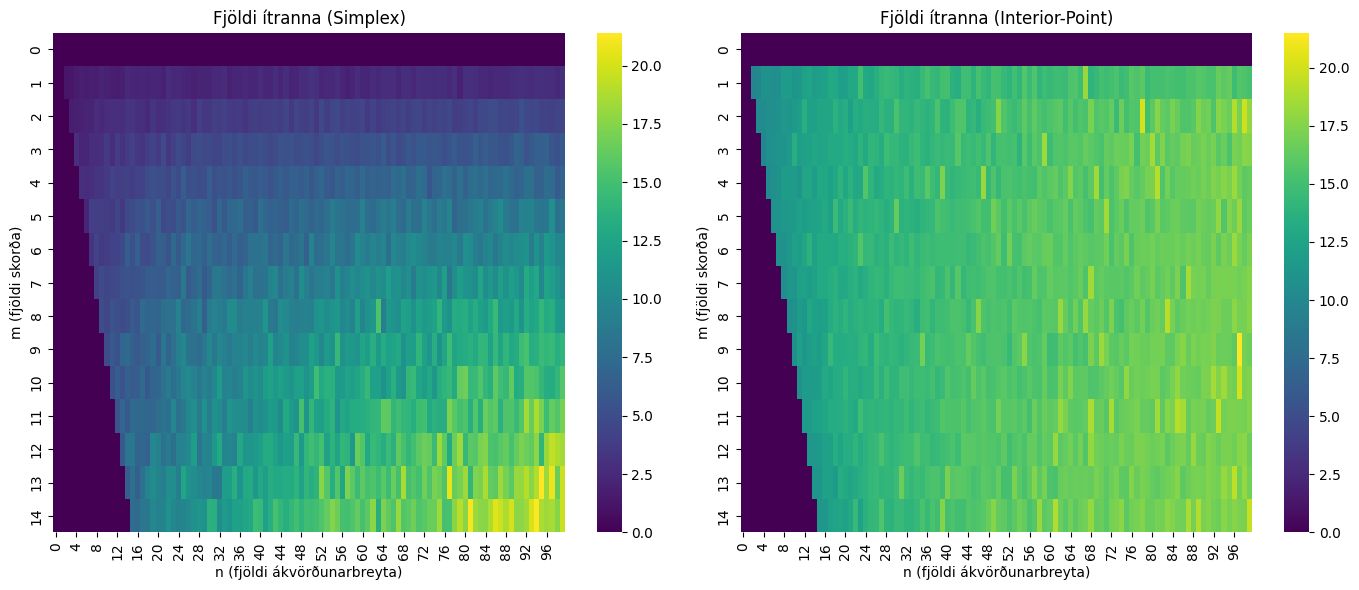

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 5))

fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Fyrir simplex
sns.heatmap(avg_it_simp, cmap="viridis", ax=axes[0])
axes[0].set_title("Fjöldi ítranna (Simplex)")
axes[0].set_xlabel("n (fjöldi ákvörðunarbreyta)")
axes[0].set_ylabel("m (fjöldi skorða)")

# Fyrir interior point
sns.heatmap(avg_it_intp, cmap="viridis", ax=axes[1])
axes[1].set_title("Fjöldi ítranna (Interior-Point)")
axes[1].set_xlabel("n (fjöldi ákvörðunarbreyta)")
axes[1].set_ylabel("m (fjöldi skorða)")

plt.tight_layout()
plt.show()

Athugum að fjólubláu gildin eru þær tvenndir sem voru ekki reiknaðar þ.e.a.s. $(m,n), m>n$. Við sjáum a fyrir minni verkefni er Simplex hraðari en þegar verkefnið stækkar byrjar það að jafnast út. Við sjáum einnig að vaxtarhraði ítranna hjá simplex er töluvert hraðari en hjá interior point þannig við mættum búast við þvi að fyrir ennþá stærri verkefni gæti simplex orðið töluvert verra en interior point. Við skulum líka skoða þessar aðferðir sem föll í þrívíðu rúmi.

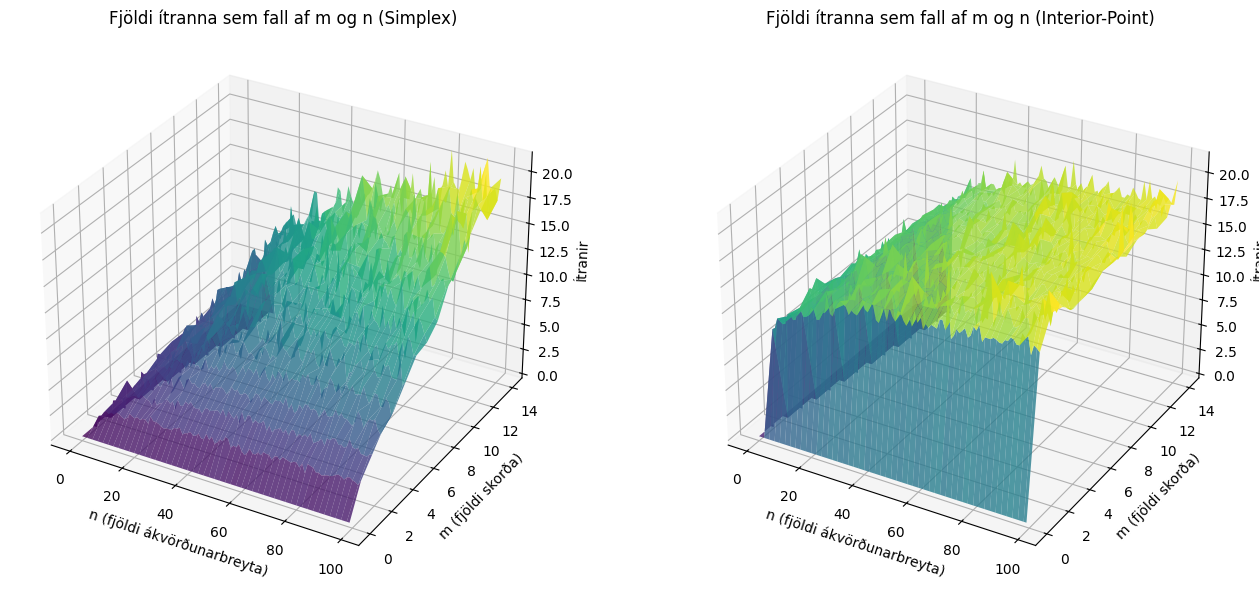

In [24]:
from mpl_toolkits.mplot3d import Axes3D

# Create meshgrid for indices (assuming avg_it_simp and avg_it_intp have the same shape)
m_values = np.arange(avg_it_simp.shape[0])  # Row indices
n_values = np.arange(avg_it_simp.shape[1])  # Column indices
Mx, Nx = np.meshgrid(n_values, m_values)  # Swap order to match indexing

fig = plt.figure(figsize=(14, 6))

# First subplot: avg_it_simp
ax1 = fig.add_subplot(121, projection='3d')
ax1.plot_surface(Mx, Nx, avg_it_simp, cmap="viridis", alpha=0.8)
ax1.set_title("Fjöldi ítranna sem fall af m og n (Simplex)")
ax1.set_xlabel("n (fjöldi ákvörðunarbreyta)")
ax1.set_ylabel("m (fjöldi skorða)")
ax1.set_zlabel("Ítranir")

# Second subplot: avg_it_intp
ax2 = fig.add_subplot(122, projection='3d')
ax2.plot_surface(Mx, Nx, avg_it_intp, cmap="viridis", alpha=0.8)
ax2.set_title("Fjöldi ítranna sem fall af m og n (Interior-Point)")
ax2.set_xlabel("n (fjöldi ákvörðunarbreyta)")
ax2.set_ylabel("m (fjöldi skorða)")
ax2.set_zlabel("Ítranir")

plt.tight_layout()  # Adjust spacing
plt.show()


Hér sjáum við ennþá betur muninn í vaxtarhraði á sitthvorri aðferðinni. Meðan í simplex aðferðinni ítranirnar hækka stöðugt er fallið nær því að vera flatt í interior point. Endum á því að skoða hlutfallið milli þeirra þ.e.a.s. hlutfall = fjöldi ítranna interior point/fjöldi ítranna simplex. Þá ef hlutfall er > 1 þá simplex hagstæðara en ef < 1 interior point hagstæðara. Við höfum þá: 

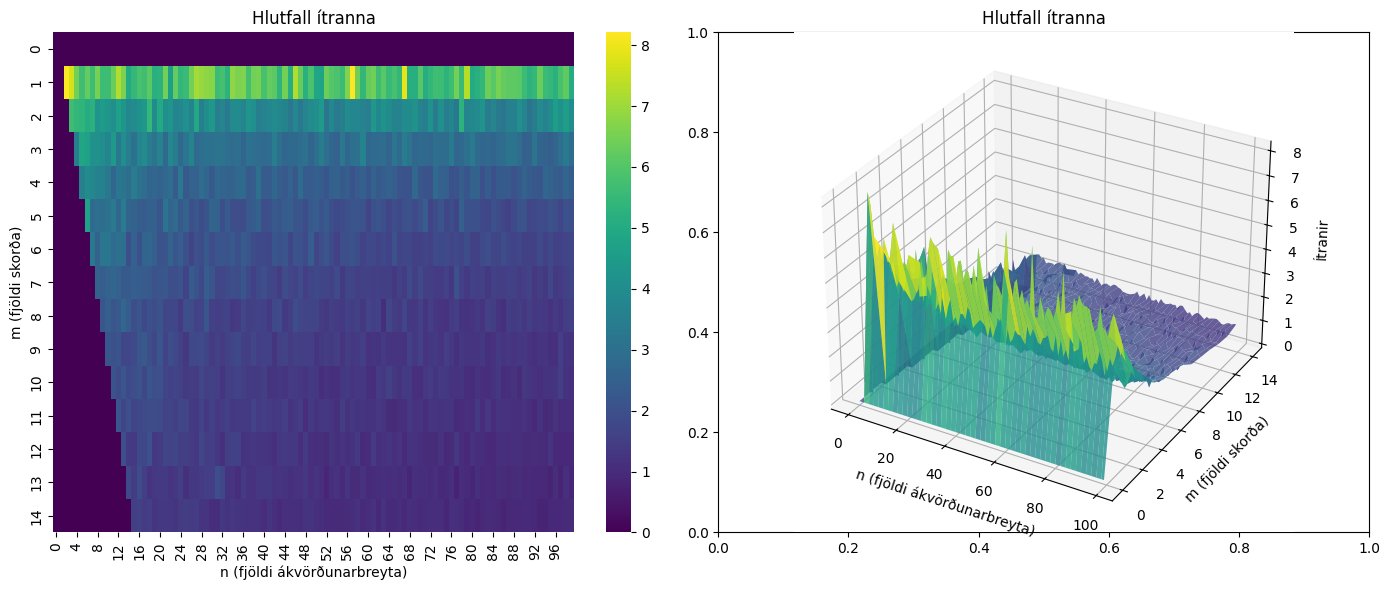

In [29]:
# Hlutfall interior point og simplex
A = np.divide(avg_it_intp, avg_it_simp, where=avg_it_simp!=0)

fig, axes = plt.subplots(1, 2, figsize=(14, 6), subplot_kw={"projection": None})  

sns.heatmap(A, cmap="viridis", ax=axes[0])
axes[0].set_title("Hlutfall ítranna")
axes[0].set_xlabel("n (fjöldi ákvörðunarbreyta)")
axes[0].set_ylabel("m (fjöldi skorða)")

ax2 = fig.add_subplot(122, projection='3d') 

ax2.plot_surface(Mx, Nx, A, cmap="viridis", alpha=0.8)
ax2.set_title("Hlutfall ítranna")
ax2.set_xlabel("n (fjöldi ákvörðunarbreyta)")
ax2.set_ylabel("m (fjöldi skorða)")
ax2.set_zlabel("Ítranir")

plt.tight_layout() 
plt.show()

Við sjáum þá aftur að simplex virðist betra fyrir minni verkefni. Áhugaverðara er þó að sjá að m virðist hafa töluvert meiri áhrif á hve mikið betri interiorpoint er en n. Við sjáum að hlutfallið helst svipað með stækkandu n-i en minnkar með stækkandi m-i.

Niðurstaðan af þessum mælingum er að fyrir minni verkefni er simplex betra en þegar þau fara að verða mjög stór gæti reynst sniðugt að skipta í interior point.